# Bilateral Filtering

---


In [1]:
import cv2
import matplotlib.pyplot as plt

import bilateral_filter as bf

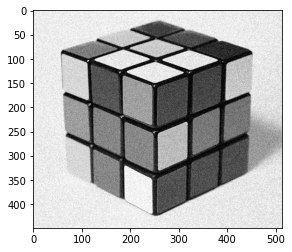

Image shape:  (449, 513)


In [2]:
img: cv2.Mat = cv2.imread('./images/rubiks_cube.png', 0)
plt.imshow(img, cmap='gray')                                # type: ignore
plt.show()

print('Image shape: ', img.shape)

In [3]:
filter_size = 15
spread = (filter_size - 1) // 2
sigma_d = 5
sigma_r = 5

In [4]:
bi_filter = bf.BilateralFilter(filter_size, sigma_d, sigma_r)
output_img = bi_filter.apply(img)


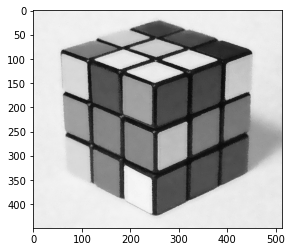

In [5]:
plt.imshow(output_img, cmap='gray')                         # type: ignore
plt.show()


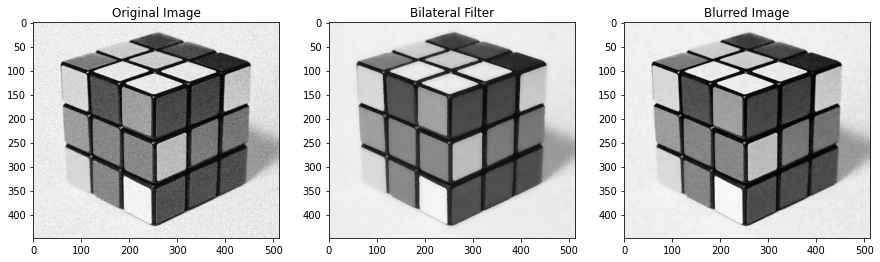

In [6]:
blurred_img = cv2.bilateralFilter(img, filter_size, 15, sigma_d)    # type: ignore

figure, axis = plt.subplots(1, 3, figsize=(15, 15))
axis[0].imshow(img, cmap='gray')                                    # type: ignore
axis[0].set_title('Original Image')                                 # type: ignore
axis[1].imshow(output_img, cmap='gray')                             # type: ignore
axis[1].set_title('Bilateral Filter')                               # type: ignore
axis[2].imshow(blurred_img, cmap='gray')                            # type: ignore
axis[2].set_title('Blurred Image')                                  # type: ignore
plt.show()

In [7]:
print("Maximum Intensity of the Input/Original Image: ", output_img.max())      # type: ignore
print("Minimum Intensity of the Input/Original Image: ", output_img.min())      # type: ignore
print("Mean Intensity of the Input/Original Image: ", output_img.mean())
print("Standard Deviation of the Input/Original Image: ", output_img.std())

print("Shape of the Input/Original image: ", output_img.shape)
print("Size of the Input/Original image: ", output_img.size / 1024 ** 2, "MB")
print("Type of the Input/Original image: ", output_img.dtype)


Maximum Intensity of the Input/Original Image:  252
Minimum Intensity of the Input/Original Image:  0
Mean Intensity of the Input/Original Image:  167.03268254774525
Standard Deviation of the Input/Original Image:  76.18920760987469
Shape of the Input/Original image:  (449, 513)
Size of the Input/Original image:  0.2196664810180664 MB
Type of the Input/Original image:  int16
